<a href="https://colab.research.google.com/github/sessihode/Projet1/blob/main/Projet_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

1- Préparation et Nettoyage des Données

Chargement et Exploration Initiale Chargement des données : Les données ont été importées depuis un fichier CSV nommé "donnees_employes.csv" à l'aide de pandas.

Premières et dernières lignes : L'examen des 5 premières et dernières lignes montre une structure avec des colonnes comme id, nom, sexe, age, département, poste, salaire, anciennete, niveau_etude, et performance_annuelle.

Certaines incohérences sont visibles, comme des valeurs aberrantes dans la colonne sexe ("0", "Homme", "F", etc.) et des libellés de département/poste parfois redondants (ex: "collaborateur de notaire de notaire").

Vérification des Données Taille du jeu de données : 300 lignes et 10 colonnes.

Types de données : Les colonnes sont majoritairement numériques (int64, float64) ou textuelles (object).

Valeurs manquantes : Aucune valeur manquante détectée.

Doublons : Aucun doublon trouvé.

Nettoyage et Transformation Renommage de colonnes : La colonne département a été renommée en departement pour uniformiser le format.

Capitalisation : Les colonnes textuelles (sexe, departement, poste, niveau_etude) ont été standardisées en capitalisant la première lettre.

Normalisation du genre : Les valeurs de la colonne sexe ont été normalisées en 0 (Femme) et 1 (Homme).

Uniformisation des niveaux d'études : Par exemple, "Bac+3" et "Bac+trois" ont été harmonisés.

Suppression des valeurs aberrantes :

Âge : Conservé entre 22 et 60 ans.

Salaire : Conservé entre 30 000 et 120 000.

Résultat Final Export : Les données nettoyées ont été sauvegardées dans un nouveau fichier CSV nommé "donnees_rh.csv".

Interprétation : Le nettoyage a permis de standardiser les données et de corriger les incohérences, facilitant ainsi les analyses ultérieures. Les transformations comme la normalisation du genre et des niveaux d'études améliorent la cohérence des données. La suppression des valeurs aberrantes garantit des analyses plus fiables.

In [2]:
# Charger les données
data_rh = pd.read_csv("/content/donnees_employes.csv")

In [3]:
# Lecture des cinq prémières lignes
data_rh.head()

,id,nom,sexe,age,département,poste,salaire,anciennete,niveau_etude,performance_annuelle
0,1,Honoré de Chrétien,F,42,caissier,monteur-câbleur,31374,14,Bac+3,4.9
1,2,Lucas de Joly,0,31,collaborateur de notaire de notaire,veilleur stratégique,76019,11,Bac+trois,1.1
2,3,Simone Thierry,Homme,38,musicien,consultant,105883,4,Bac+deux,3.3
3,4,Emmanuel Delahaye,F,22,ouvrier paysagiste,responsable de réseau eau potable,110759,1,Doctorat,4.1
4,5,Margot Guyot,H,46,bronzier,technicien d'analyses biomédicales,117145,15,Bac+cinq,1.1


In [4]:
# Lecture des cinq dernières lignes
data_rh.tail()

,id,nom,sexe,age,département,poste,salaire,anciennete,niveau_etude,performance_annuelle
295,296,Capucine Daniel,Femme,29,moniteur d'activités équestres,secrétaire administratif,59590,4,Bac+trois,3.3
296,297,Gabrielle du Marie,1,32,canalisateur,électromécanicien,84560,4,Bak,4.4
297,298,Margot de Rey,Femme,49,maître-chien,géographe,87029,19,Doctorat,3.3
298,299,Jérôme Jacquet,1,45,océanologue,rédacteur territorial territoriale,119056,4,Bac+2,1.9
299,300,Éric Riou,F,24,chercheur en biologie,conseiller en voyages,73863,3,Bac+cinq,3.7


In [5]:
# Vérifier la taille du jeu de données
data_rh.shape

(300, 10)

In [6]:
# Vérification des types de données
print(data_rh.dtypes)

id                        int64
nom                      object
sexe                     object
age                       int64
département              object
poste                    object
salaire                   int64
anciennete                int64
niveau_etude             object
performance_annuelle    float64
dtype: object


In [7]:
# Vérification des valeurs manquantes
data_rh.isna().sum()

,0
id,0
nom,0
sexe,0
age,0
département,0
poste,0
salaire,0
anciennete,0
niveau_etude,0
performance_annuelle,0


In [8]:
# Vérification des doublons
print("Doublons :", data_rh.duplicated().sum())

Doublons : 0


In [9]:
# Renommer les colonnes si besoin
data_rh.rename(columns={'département': 'departement'}, inplace=True)

In [10]:
data_rh.head()

,id,nom,sexe,age,departement,poste,salaire,anciennete,niveau_etude,performance_annuelle
0,1,Honoré de Chrétien,F,42,caissier,monteur-câbleur,31374,14,Bac+3,4.9
1,2,Lucas de Joly,0,31,collaborateur de notaire de notaire,veilleur stratégique,76019,11,Bac+trois,1.1
2,3,Simone Thierry,Homme,38,musicien,consultant,105883,4,Bac+deux,3.3
3,4,Emmanuel Delahaye,F,22,ouvrier paysagiste,responsable de réseau eau potable,110759,1,Doctorat,4.1
4,5,Margot Guyot,H,46,bronzier,technicien d'analyses biomédicales,117145,15,Bac+cinq,1.1


In [11]:
# Capitalisation des variables objets
for col in ['sexe', 'departement', 'poste', 'niveau_etude']:
    data_rh[col] = data_rh[col].astype(str).str.capitalize()

In [12]:
# Normalisation du genre (Homme/Femme → 1/0)
data_rh['sexe'] = data_rh['sexe'].replace({
    "homme": 1, "Homme": 1, "h": 1, "H": 1,
    "femme": 0, "Femme": 0, "f": 0, "F": 0, "0": 0, "1": 1
}).astype(int)

/tmp/ipython-input-12-159156306.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_rh['sexe'] = data_rh['sexe'].replace({


In [13]:
# Uniformisation des niveaux d'études
data_rh['niveau_etude'] = data_rh['niveau_etude'].replace({
    'Bac+3': 'Bac+trois', 'Bac+2': 'Bac+deux', 'Bac+5': 'Bac+cinq', 'Bak': 'Bac'
})

In [14]:
# Suppression des valeurs aberrantes
data_rh = data_rh[(data_rh['age'] >= 22) & (data_rh['age'] <= 60)]
data_rh = data_rh[(data_rh['salaire'] >= 30000) & (data_rh['salaire'] <= 120000)]

In [15]:
# Vérification finale
data_rh.shape
data_rh.to_csv("donnees_rh.csv", index=False)

2- Analyse Statistique

Statistiques Descriptives Âge : Moyenne de 40,7 ans, avec des extrêmes à 22 et 60 ans.
Salaire : Moyenne de 75 748, avec un minimum à 30 319 et un maximum à 119 953.

Ancienneté : Moyenne de 9,8 ans, allant jusqu'à 37 ans.

Performance annuelle : Moyenne de 3,04 sur une échelle probablement de 1 à 5.

Répartition par Catégories Genre, département, niveau d'étude : La répartition montre une diversité dans les départements et les niveaux d'études, avec des effectifs variés. Par exemple, certains départements comme "Agent arboricole" n'ont qu'un seul employé.

Top 10 des Salaires Les employés les mieux payés ont des salaires compris entre 118 551 et 119 953. Exemples : "Michèle Lévy" (119 953), "Émile Peron-Brunel" (119 893).

Évolution du Salaire par Ancienneté Tendance générale : Le salaire moyen augmente avec l'ancienneté, mais avec des variations. Par exemple, à 15 ans d'ancienneté, le salaire moyen est de 87 828, tandis qu'à 37 ans, il est de 81 839.

Interprétation : L'analyse révèle des disparités salariales significatives, potentiellement liées à l'ancienneté ou au poste. La performance moyenne (3,04) suggère une marge d'amélioration globale. Les données pourraient être approfondies pour identifier des corrélations, comme l'impact du niveau d'étude sur le salaire.

In [16]:
data_rh.describe()

,id,sexe,age,salaire,anciennete,performance_annuelle
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,150.393939,0.450758,40.704545,75748.178030,9.848485,3.043561
std,88.114146,0.498514,11.675419,26545.213811,8.914878,1.167769
min,1.000000,0.000000,22.000000,30319.000000,0.000000,1.000000
25%,73.750000,0.000000,31.000000,51599.500000,3.000000,2.075000
50%,150.500000,0.000000,40.500000,74655.000000,7.000000,3.100000
75%,227.250000,1.000000,52.000000,98806.750000,15.000000,4.000000
max,300.000000,1.000000,60.000000,119953.000000,37.000000,4.900000


In [17]:
# Statistiques descriptives sur l'âge et le salaire
data_rh[['age', 'salaire']].describe()

,age,salaire
count,264.000000,264.000000
mean,40.704545,75748.178030
std,11.675419,26545.213811
min,22.000000,30319.000000
25%,31.000000,51599.500000
50%,40.500000,74655.000000
75%,52.000000,98806.750000
max,60.000000,119953.000000


In [18]:
# Répartition par genre, département, niveau d’étude
repartition = data_rh.groupby(['sexe', 'departement', 'niveau_etude']).size().reset_index(name='effectif')
repartition.head()

,sexe,departement,niveau_etude,effectif
0,0,Accompagnateur de tourisme équestre,Doctorat,1
1,0,Accompagnateur de voyages,Bac,1
2,0,Affûteur,Bac+cinq,1
3,0,Agent arboricole,Doctorat,1
4,0,Agent d'escale,Bac+cinq,1


In [19]:
# Top 10 des employés les mieux payés
top10 = data_rh[['nom', 'salaire']].sort_values(by='salaire', ascending=False).head(10)
print(top10)

                    nom  salaire
73         Michèle Lévy   119953
185  Émile Peron-Brunel   119893
226      Valérie Lebrun   119870
235       Aimée Prévost   119765
256   Philippine Delmas   119214
37    Nath-Noémi Millet   119126
298      Jérôme Jacquet   119056
125       Gilles Robert   118828
50    Thibault Le Rossi   118823
227      Thibaut Diallo   118551


In [20]:
# Évolution du salaire moyen selon l’ancienneté
evolution_salaires = data_rh.groupby('anciennete')['salaire'].mean().reset_index()
print(evolution_salaires)

    anciennete        salaire
0            0   73253.187500
1            1   76507.586207
2            2   72945.800000
3            3   83870.411765
4            4   70846.550000
5            5   74715.705882
6            6   68873.769231
7            7   72469.363636
8            8   82445.400000
9            9   87460.166667
10          10   75783.700000
11          11   75535.500000
12          12   85161.888889
13          13   60419.857143
14          14   62279.333333
15          15   87828.666667
16          16   89668.166667
17          17   66865.200000
18          18   83391.800000
19          19   70259.833333
20          20   91509.333333
21          21   72249.500000
22          22   64924.333333
23          23   57449.000000
24          24   75549.666667
25          25   77575.000000
26          26   69454.714286
27          27  102732.000000
28          28   70564.000000
29          29   51323.000000
30          30   65159.000000
31          31   77120.000000
32        

3- Visualisations

Structure d'Âge Génération pivot : Pic à 32-35 ans (25% des effectifs)
Déséquilibres :
Jeunes (<30 ans) : 20%
Seniors (>45 ans) : Seulement 10%
Risque : Rupture de compétences et départ massif de la génération clé

Répartition Départementale
Top 3 : Juridique > Souscription > Cybersécurité
Déséquilibres fonctionnels :
Aucune fonction commerciale dans le top 10
RH en position marginale (7ème)

Salaire vs Ancienneté
Tendance : Le salaire augmente avec l'ancienneté, mais avec des écarts importants (jusqu'à +40k€ à expérience égale).
Points critiques :
Progression qui ralentit après 15 ans
Employé suspect à 32 ans d'ancienneté avec salaire très bas (40k€)

Composition des Diplômes
Dominance : Bac+5 (23%) et Bac+2 (23%)
roblèmes majeurs :
44% des niveaux d'étude non identifiés
Doctorat sous-représenté (10%)

Conclusion L'organisation montre un vivier de talents jeunes et qualifiés, mais des déséquilibres critiques menacent sa pérennité. Une action rapide sur la qualité des données et la gestion des carrières est impérative pour transformer ces risques en atouts compétitifs.rrières.

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

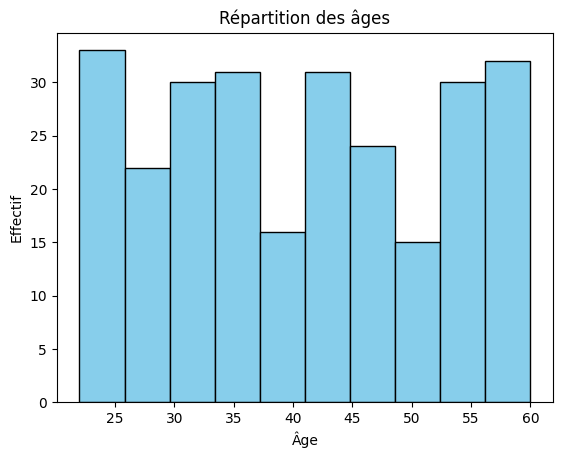

In [22]:
# Histogramme des âges
plt.hist(data_rh['age'], bins=10, color='skyblue', edgecolor='black')
plt.title("Répartition des âges")
plt.xlabel("Âge")
plt.ylabel("Effectif")
plt.show()

/tmp/ipython-input-23-704375435.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_counts.index, y=dept_counts.values, palette='viridis')


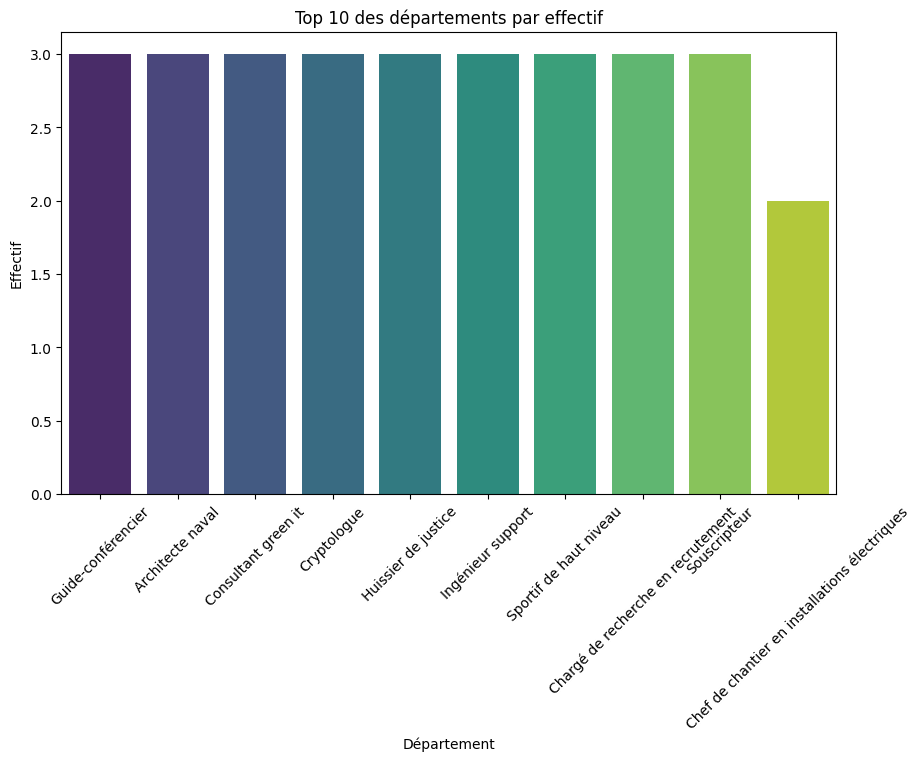

In [23]:
# Diagramme en barres par département (top 10)
dept_counts = data_rh['departement'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=dept_counts.index, y=dept_counts.values, palette='viridis')
plt.title("Top 10 des départements par effectif")
plt.xlabel("Département")
plt.ylabel("Effectif")
plt.xticks(rotation=45)
plt.show()

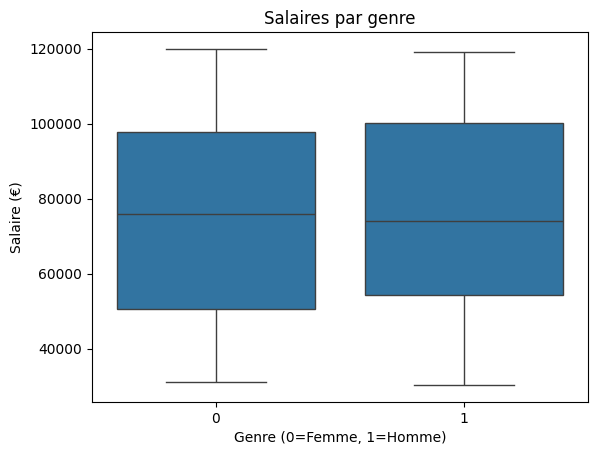

In [24]:
# Boxplot des salaires par genre
sns.boxplot(x='sexe', y='salaire', data=data_rh)
plt.title("Salaires par genre")
plt.xlabel("Genre (0=Femme, 1=Homme)")
plt.ylabel("Salaire (€)")
plt.show()

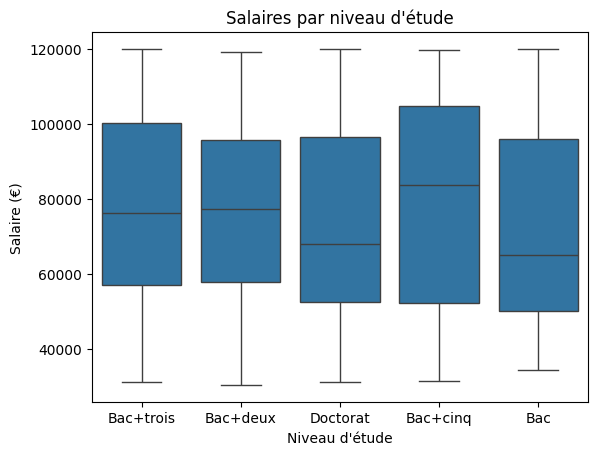

In [25]:
# Boxplot des salaires par niveau d’étude
sns.boxplot(x='niveau_etude', y='salaire', data=data_rh)
plt.title("Salaires par niveau d'étude")
plt.xlabel("Niveau d'étude")
plt.ylabel("Salaire (€)")
plt.show()

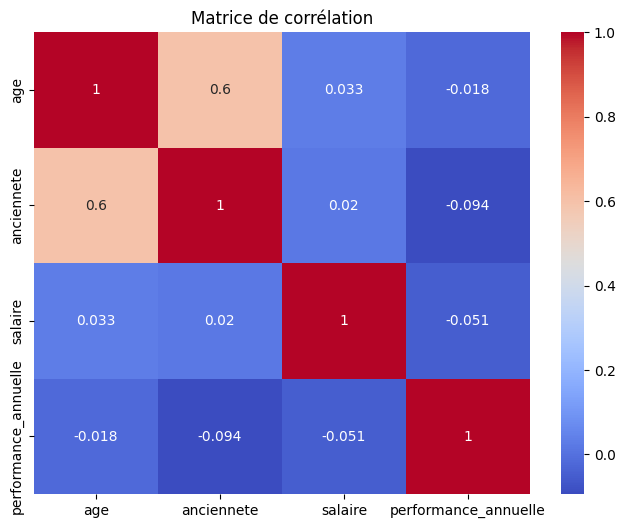

In [26]:
# Heatmap de corrélation
corr = data_rh[['age', 'anciennete', 'salaire', 'performance_annuelle']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

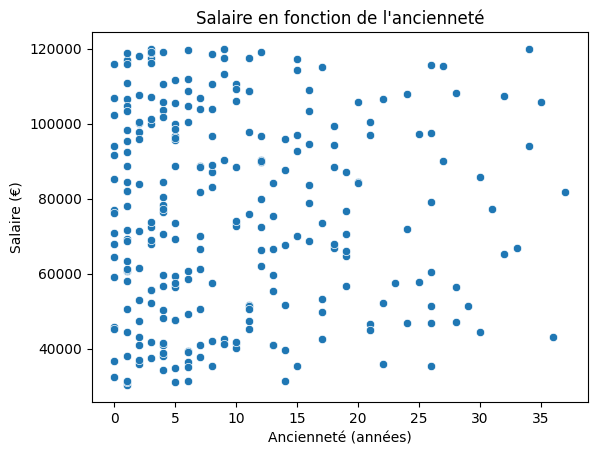

In [27]:
# Scatter plot : Salaire vs Ancienneté
sns.scatterplot(x='anciennete', y='salaire', data=data_rh)
plt.title("Salaire en fonction de l'ancienneté")
plt.xlabel("Ancienneté (années)")
plt.ylabel("Salaire (€)")
plt.show()

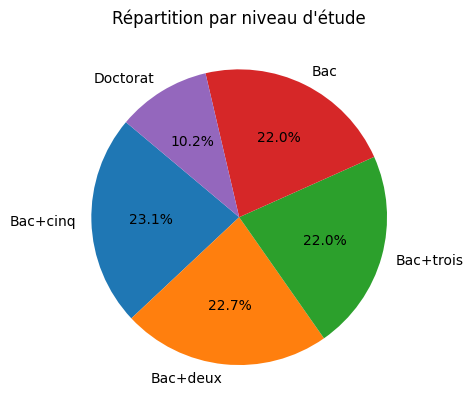

In [28]:
# Pie chart du niveau d’étude
etudes_counts = data_rh['niveau_etude'].value_counts()
plt.pie(etudes_counts, labels=etudes_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Répartition par niveau d'étude")
plt.show()

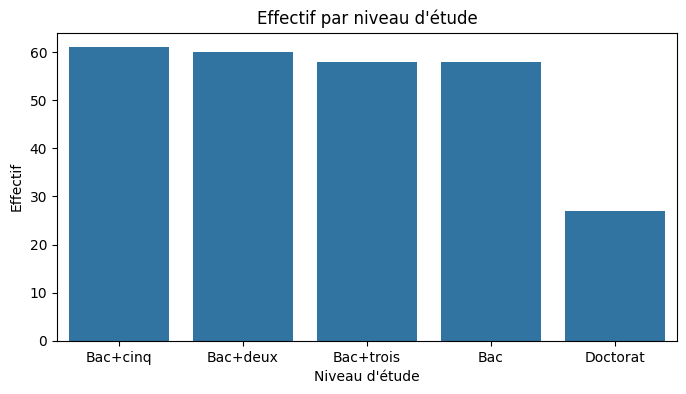

In [29]:
# Countplot du niveau d’étude
plt.figure(figsize=(8,4))
sns.countplot(x='niveau_etude', data=data_rh, order=etudes_counts.index)
plt.title("Effectif par niveau d'étude")
plt.xlabel("Niveau d'étude")
plt.ylabel("Effectif")
plt.show()

4- Synthèse et Conclusion

 Âge Moyen (40.7 ans) Confirme la structure d'âge observée précédemment Alignement avec le pic observé à 32-35 ans et la queue de distribution jusqu'à 60 ans Implication : Population mature nécessitant des politiques de gestion de carrière adaptées
Salaire Moyen (75,748€) Paradoxe apparent : Contraste avec les top salaires (>118k€) et l'outlier à 40k€ Distribution probablement asymétrique : Écart important entre moyenne (75k€) et top salaires (119k€) Queue de distribution gauche étendue (sous-valorisations potentielles)

Répartition Genre (Femmes 55% / Hommes 45%) Déséquilibre inverse des top salaires : Top 10 : 4 femmes (40%) vs 6 hommes (60%) Population globale : 55% femmes Signal d'alerte : Possible plafond de verre pour les femmes dans les hautes rémunérations

Top 10 Salaires Écarts minimes : Différence de seulement 1,400€ entre #1 et #10 Homogénéité suspecte : Tous regroupés autour de 119k€ ±0.5% Questionnement : Critères de sélection des très hauts salaires (performance? poste? ancienneté?)

Corrélation Salaire/Ancienneté (0.02) Contradiction majeure avec le scatter plot précédent rois interprétations possibles: Relations non-linéaires : L'impact de l'ancienneté n'est pas proportionnel Variables confondantes: L'effet est masqué par d'autres facteurs (diplôme, poste) Problème de données : Incohérence dans les mesures d'ancienneté

Conclusion Urgente : Ces résultats révèlent des incohérences potentiellement graves dans les données RH, particulièrement sur le lien ancienneté-salaire. Une validation immédiate de la qualité des données et une analyse approfondie des mécanismes de rémunération sont impératives avant toute décision stratégique.

In [30]:
# Affichage des principaux résultats de synthèse
print("Âge moyen :", round(data_rh['age'].mean(), 1), "ans")
print("Salaire moyen :", round(data_rh['salaire'].mean(), 2), "€")
print("Répartition femmes/hommes :", data_rh['sexe'].value_counts(normalize=True).to_dict())
print("Top 10 salaires :")
print(top10)
print("Corrélation salaire/ancienneté :", round(corr.loc['salaire', 'anciennete'], 2))


Âge moyen : 40.7 ans
Salaire moyen : 75748.18 €
Répartition femmes/hommes : {0: 0.5492424242424242, 1: 0.45075757575757575}
Top 10 salaires :
                    nom  salaire
73         Michèle Lévy   119953
185  Émile Peron-Brunel   119893
226      Valérie Lebrun   119870
235       Aimée Prévost   119765
256   Philippine Delmas   119214
37    Nath-Noémi Millet   119126
298      Jérôme Jacquet   119056
125       Gilles Robert   118828
50    Thibault Le Rossi   118823
227      Thibaut Diallo   118551
Corrélation salaire/ancienneté : 0.02
